In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


In [ ]:
url = 'https://raw.githubusercontent.com/useless1801/Data_Customer/main/Data_Startups.csv'
ds = pd.read_csv(url)
dq = ds.drop(columns=['City'])
print(dq)

In [23]:
dq.isna().sum()

R&D Spend          2
Administration     2
Marketing Spend    1
Profit             0
dtype: int64

In [24]:
dq.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        48 non-null     float64
 1   Administration   48 non-null     float64
 2   Marketing Spend  49 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [25]:
x = dq.iloc[:, :-1].values
y = dq.iloc[:, 3].values

In [27]:
x

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52,       nan, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [      nan, 135495.07, 252664.93],
       [119943.24, 156547.42,       nan],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [7]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [28]:


imputa = SimpleImputer(missing_values= np.nan, strategy='mean')
imputa.fit(x[:, 0:3])

x[:, 0:3] = imputa.transform(x[:, 0:3])

imputa = SimpleImputer(missing_values= np.nan, strategy='mean')
imputa.fit(x[:, 0:3])

x[:, 0:3] = imputa.transform(x[:, 0:3])

In [29]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X = LabelEncoder()
x[:, 2] = labelencoder_X.fit_transform(x[:, 2])

columns_to_encode = [2]


ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), columns_to_encode)
    ],
    remainder='passthrough'
)

X_encoded = ct.fit_transform(x)

In [30]:
x.astype(int)
y.astype(int)

array([192261, 191792, 191050, 182901, 166187, 156991, 156122, 155752,
       152211, 149759, 146121, 144259, 141585, 134307, 132602, 129917,
       126992, 125370, 124266, 122776, 118474, 111313, 110352, 108733,
       108552, 107404, 105733, 105008, 103282, 101004,  99937,  97483,
        97427,  96778,  96712,  96479,  90708,  89949,  81229,  81005,
        78239,  77798,  71498,  69758,  65200,  64926,  49490,  42559,
        35673,  14681])

In [31]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2509)




In [32]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9514375314155519

In [33]:
y_pred = model.predict(x_test)

In [34]:
d = {'y_pred': y_pred, 'y_test': y_test}

In [35]:
pd.DataFrame(d)

,y_pred,y_test
0,99717.538245,97427.84
1,100106.555747,96778.92
2,49066.491000,42559.73
3,156951.609248,149759.96
4,113391.187731,89949.14
5,154961.312637,152211.77
6,113586.541031,108733.99
7,113218.779811,108552.04
8,132081.135670,125370.37
9,189319.183979,191792.06


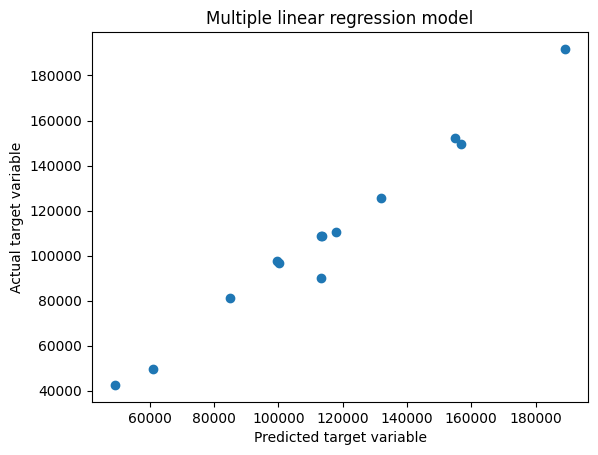

In [36]:
plt.scatter(y_pred, y_test)

plt.xlabel('Predicted target variable')
plt.ylabel('Actual target variable')
plt.title('Multiple linear regression model')

plt.show()

In [37]:
import pickle
pickle.dump(model, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[20.1, 56.3, 80.0]]))

[76764.80424446]
